In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/data-storm-10/credit_card_default_test.csv
/kaggle/input/data-storm-10/Credit_card_default - Business Problem - Assessment Criteria - Data Dictionary.xlsx
/kaggle/input/data-storm-10/credit_card_default_train.csv
/kaggle/input/data-storm-10/DATA STORM 1.0 - First Round Competition Guidlines.pdf


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

train_data = pd.read_csv("/kaggle/input/data-storm-10/credit_card_default_train.csv")
test_data = pd.read_csv("/kaggle/input/data-storm-10/credit_card_default_test.csv")
train_data.head(10)

train_data.columns

Index(['Client_ID', 'Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS',
       'MARITAL_STATUS', 'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC', 'NEXT_MONTH_DEFAULT'],
      dtype='object')

In [3]:
def visualizeData(data_set):
    varialbes =['Gender', 'EDUCATION_STATUS','MARITAL_STATUS','Balance_Limit_V1']

    for varialbe in varialbes:
        pivot_plot = pd.pivot_table(data_set, values='Client_ID', index=list([varialbe]), columns=['NEXT_MONTH_DEFAULT'], aggfunc='count')
        print(pivot_plot)
        subplots = pivot_plot.plot.pie(subplots=True,figsize=(10,10))
        subplots[0].title.set_text('Paid')
        subplots[1].title.set_text('Defualt')
        print("\n")
        
    for varialbe in varialbes:
        pivot_plot = pd.pivot_table(data_set, values='Client_ID', index=['NEXT_MONTH_DEFAULT'], columns=list([varialbe]), aggfunc='count')
        print(pivot_plot)
        subplots = pivot_plot.plot.pie(subplots=True,figsize=(20,20))
        print("\n")
    

NEXT_MONTH_DEFAULT      0     1
Gender                         
F                    7218  2322
M                   11452  3008


NEXT_MONTH_DEFAULT     0     1
EDUCATION_STATUS              
Graduate            6828  1650
High School         2939   986
Other               8903  2694


NEXT_MONTH_DEFAULT      0     1
MARITAL_STATUS                 
Other               10306  2764
Single               8364  2566


NEXT_MONTH_DEFAULT     0     1
Balance_Limit_V1              
 500K               2289   501
1.5M                1000   138
100K                2207  1242
1M                  5061   890
2.5M                  34     3
200K                3805  1354
300K                1805   606
400K                2469   596


Gender                 F      M
NEXT_MONTH_DEFAULT             
0                   7218  11452
1                   2322   3008


EDUCATION_STATUS    Graduate  High School  Other
NEXT_MONTH_DEFAULT                              
0                       6828         2939  

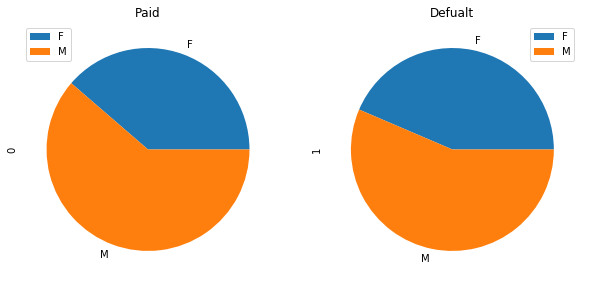

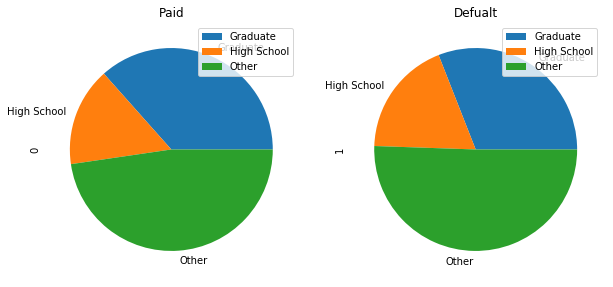

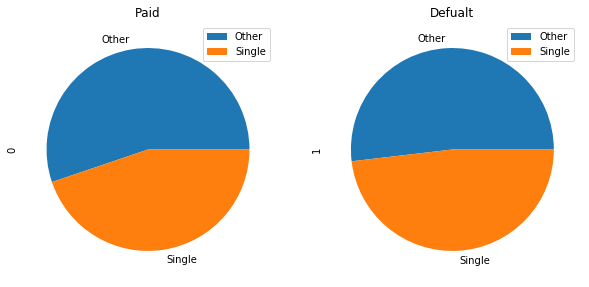

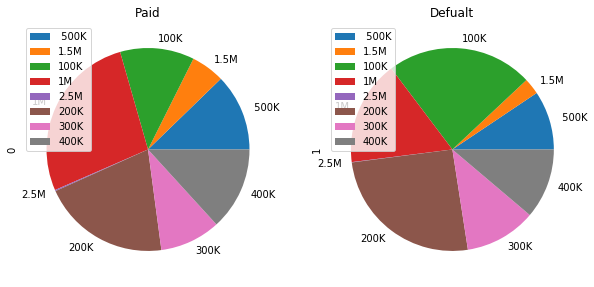

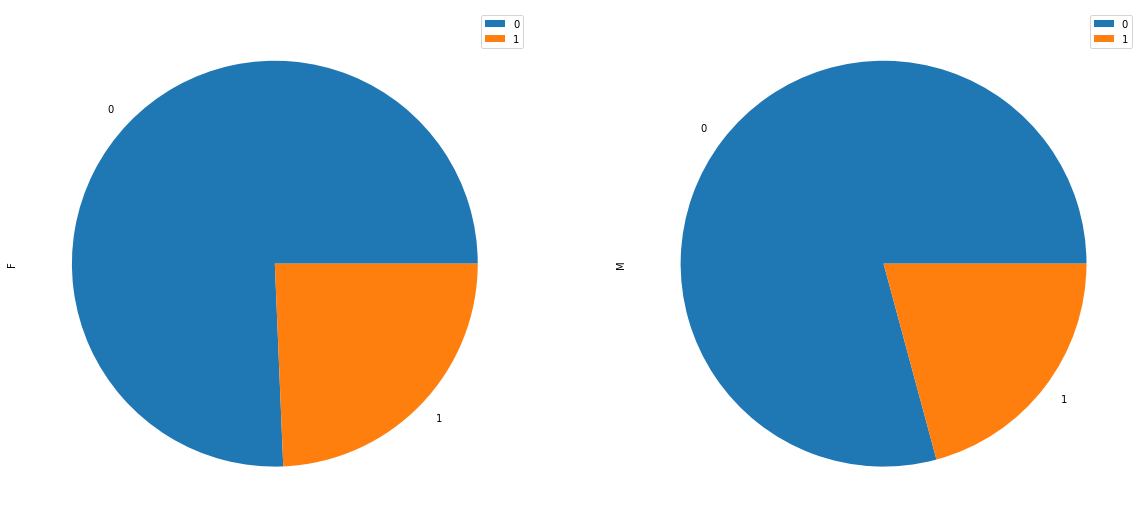

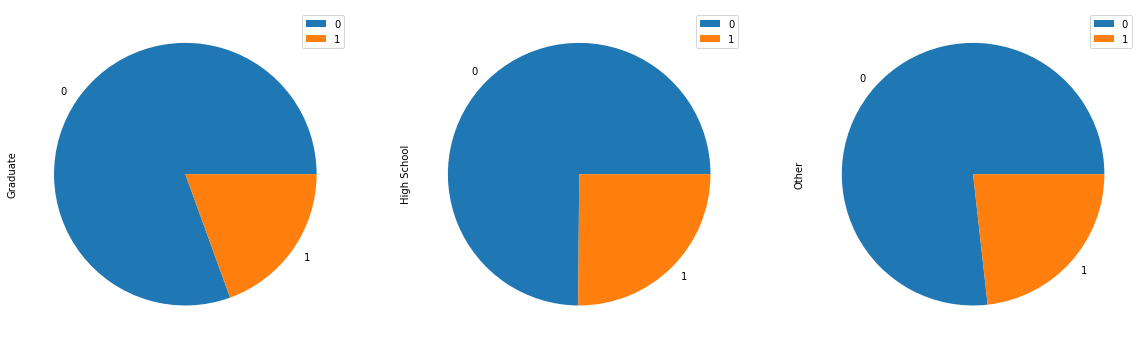

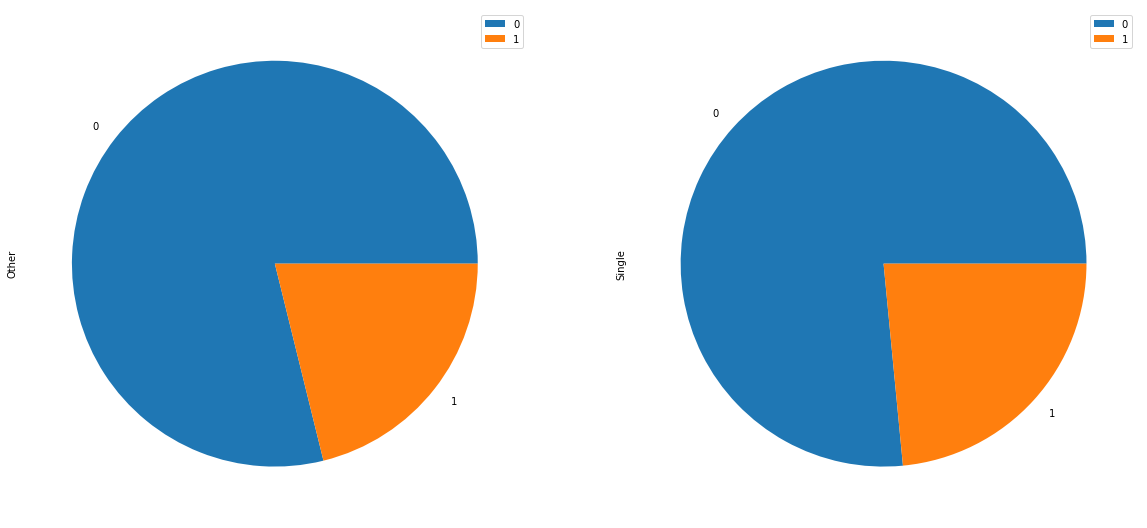

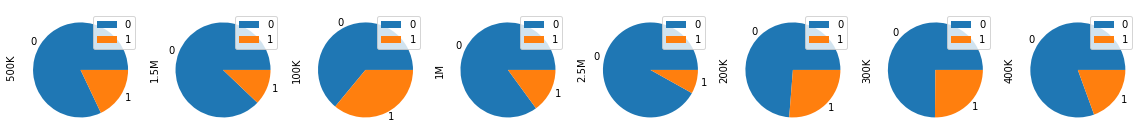

In [4]:
visualizeData(train_data)

In [5]:
#visualizeData(test_data)

In [6]:
from sklearn.preprocessing import MinMaxScaler

def PreprocessData(data_set):
    balance_limit_series = data_set['Balance_Limit_V1']

    # Process Balance Limits
    for index, val in balance_limit_series.iteritems():
      value = 0
      if val is not None:
        if val.endswith('K'):
          value = val.replace('K','')
        elif val.endswith('M'):
          value = val.replace('M','000')
      data_set['Balance_Limit_V1'] .loc[index,1] = value
    
    # Convert to catagorical
    scaler = MinMaxScaler()
    data_set[['Balance_Limit_V1']] = scaler.fit_transform(data_set[['Balance_Limit_V1']])

    data_set['Gender_CAT']= pd.Categorical(data_set['Gender'])
    data_set['Gender']= data_set.Gender_CAT.cat.codes

    data_set['EDUCATION_STATUS_CAT']= pd.Categorical(data_set['EDUCATION_STATUS'])
    data_set['EDUCATION_STATUS']= data_set.EDUCATION_STATUS_CAT.cat.codes

    data_set['AGE_CAT']= pd.Categorical(data_set['AGE'])
    data_set['AGE']= data_set.AGE_CAT.cat.codes

    data_set['MARITAL_STATUS_CAT']= pd.Categorical(data_set['MARITAL_STATUS'])
    data_set['MARITAL_STATUS']= data_set.MARITAL_STATUS_CAT.cat.codes
    
    #normalize values
    data_set.iloc[:,18:-5] = data_set.iloc[:,18:-5].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
    print("done processing")
    return 
    

    

In [7]:
processed_data = PreprocessData(train_data)  
processed_data = PreprocessData(test_data)  

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


done processing


/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


done processing


In [8]:
train_data.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,...,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT,Gender_CAT,EDUCATION_STATUS_CAT,AGE_CAT,MARITAL_STATUS_CAT
0,A2,1.000000,1,0,0,0,-1,-1,-1,-1,...,-0.139198,0.672046,4.180954,-0.310058,12.420469,0,M,Graduate,31-45,Other
1,A3,0.198798,0,1,0,2,0,-1,-1,-1,...,0.572413,0.773179,1.919769,-0.283921,0.504619,0,F,High School,Less than 30,Other
2,A4,0.098648,0,1,1,0,4,3,2,2,...,-0.245490,-0.297426,-0.309689,-0.310058,-0.290545,1,F,High School,31-45,Single
3,A5,0.198798,0,0,1,0,2,0,0,0,...,-0.176624,-0.206524,-0.182230,-0.197713,-0.198005,1,F,Graduate,31-45,Single
4,A6,1.000000,0,0,0,0,2,2,0,0,...,0.122566,0.100269,0.168283,0.145010,0.118658,0,F,Graduate,31-45,Other


In [9]:
test_data.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,...,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,Gender_CAT,EDUCATION_STATUS_CAT,AGE_CAT,MARITAL_STATUS_CAT
0,A20170,0.499249,1,2,1,0,0,0,0,0,...,0.045408,-0.002844,4.510968,1.179354,0.203001,12991,M,Other,31-45,Single
1,A16887,0.000000,0,2,1,0,0,0,0,0,...,-0.251658,-0.242586,-0.198744,-0.172989,-0.190303,4620,F,Other,31-45,Single
2,A3430,0.399099,1,2,0,2,-1,-1,2,0,...,-0.156933,-0.345225,-0.237539,-0.301477,-0.262203,40060,M,Other,Less than 30,Other
3,A3696,0.000000,1,0,1,0,1,-1,-1,-2,...,-0.191403,-0.190945,-0.294259,-0.301477,-0.334103,0,M,Graduate,31-45,Single
4,A20474,0.098648,0,1,0,2,0,0,-2,-2,...,-0.363752,-0.345225,-0.294259,-0.301477,-0.334103,0,F,High School,Less than 30,Other


In [10]:
#split in to train and validation
from sklearn.model_selection import train_test_split

train_data_set, validation_data_set = train_test_split(train_data, test_size=0.2)

In [12]:
from tensorflow import feature_column
from tensorflow.keras import layers
import tensorflow as tf

feature_columns = []

# numeric cols
for header in train_data.columns[1:-5]:
  feature_columns.append(feature_column.numeric_column(header))

feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [13]:

# Take the lavels out of the dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe_1 = dataframe.copy()
  dataframe_1 = dataframe_1.dropna()
  data_labels = dataframe_1.pop('NEXT_MONTH_DEFAULT')
  
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe_1), data_labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe_1))
  ds = ds.batch(batch_size)
  return ds

In [14]:
print(type(train_data_set))

<class 'pandas.core.frame.DataFrame'>


In [15]:
train_data_set = df_to_dataset(train_data_set)
validation_data_set = df_to_dataset(validation_data_set)


In [ ]:
from tensorflow import keras
from tensorflow import feature_column
from tensorflow.keras import layers



model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(256, activation='relu',kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None),kernel_regularizer=tf.keras.regularizers.l2(0.01),activity_regularizer=tf.keras.regularizers.l1(0.01)),
  layers.Dense(512, activation='relu',kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None),kernel_regularizer=tf.keras.regularizers.l2(0.01),activity_regularizer=tf.keras.regularizers.l1(0.01)),
  layers.Dense(512, activation='relu',kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)),
  layers.Dense(512, activation='relu',kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)),
  layers.Dense(512, activation='relu',kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)),
  layers.Dense(2, activation='softmax',kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None))
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data_set, validation_data=validation_data_set,epochs=100)

Train for 600 steps, validate for 150 steps
Epoch 1/100
600/600 [==============================] - 7s 12ms/step - loss: 522.6388 - accuracy: 0.7543 - val_loss: 28.2794 - val_accuracy: 0.7721
Epoch 2/100
600/600 [==============================] - 6s 10ms/step - loss: 18.4496 - accuracy: 0.7788 - val_loss: 17.6298 - val_accuracy: 0.7729
Epoch 3/100
600/600 [==============================] - 6s 10ms/step - loss: 12.8815 - accuracy: 0.7792 - val_loss: 13.9181 - val_accuracy: 0.7727
Epoch 4/100
600/600 [==============================] - 6s 10ms/step - loss: 11.1149 - accuracy: 0.7792 - val_loss: 11.9881 - val_accuracy: 0.7729
Epoch 5/100
600/600 [==============================] - 6s 10ms/step - loss: 9.2730 - accuracy: 0.7791 - val_loss: 10.8712 - val_accuracy: 0.7729
Epoch 6/100
600/600 [==============================] - 6s 10ms/step - loss: 8.2535 - accuracy: 0.7792 - val_loss: 9.2075 - val_accuracy: 0.7729
Epoch 7/100
600/600 [==============================] - 6s 10ms/step - loss: 6.9001